In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [ ]:
#Importing data
df = pd.read_csv('movies.csv')

In [ ]:
#looping through the df to look for any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#edit the dataset in excel

In [ ]:
#getting the datatypes
print(df.dtypes)


In [ ]:

#finding out the outliers
df.boxplot(column=['gross'])
plt.show()


In [ ]:

#dropping duplicates
df.drop_duplicates()
print(df)


In [ ]:

#ordering the data
df.sort_values(by=['gross'], inplace = False, ascending= False)

#regression plot (budget)
sns.regplot(x="gross", y="budget", data=df)
plt.show()

In [ ]:
#regression plot (score)
sns.regplot(x="score", y="gross", data=df)
plt.show()


In [ ]:

#correlation Matrix between all numeric column
df.corr(method='pearson')


In [ ]:


df.corr(method='kendall')


In [ ]:


df.corr(method='spearman')



In [ ]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True )
plt.title("Correlation matrixfor Numeric Features")
plt.xlabel("Movie feature")
plt.ylabel("Movie features")
plt.show()


In [ ]:
#Using factorize- this assigns a random numeric value for each unique category

df.apply(lambda x : x.factorize()[0]).corr(method ='pearson')

In [ ]:
correlation_matrix = df.apply(lambda x : x.factorize()[0]).corr(method='pearsom')

sns.heatmap(correlation_matrix, annot= True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [ ]:
correlation_mat = df.apply(lambda x : x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

In [ ]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

In [ ]:
# Looking at the top 15 companies by gross revenue
CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending=False)

CompanyGrossSumSorted = CompanyGrossSum['gross'].astype('int64')

CompanyGrossSumSorted

In [ ]:
df['year'] =df['released'].astype(str).str[:4]
df

In [ ]:
df.groupby(['company', 'year'])[["gross"]].sum()

In [ ]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross', 'company', 'year'])

CompanyGrossSumSorted = CompanyGrossSum['gross'].astype('int64')

CompanyGrossSumSorted

In [21]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

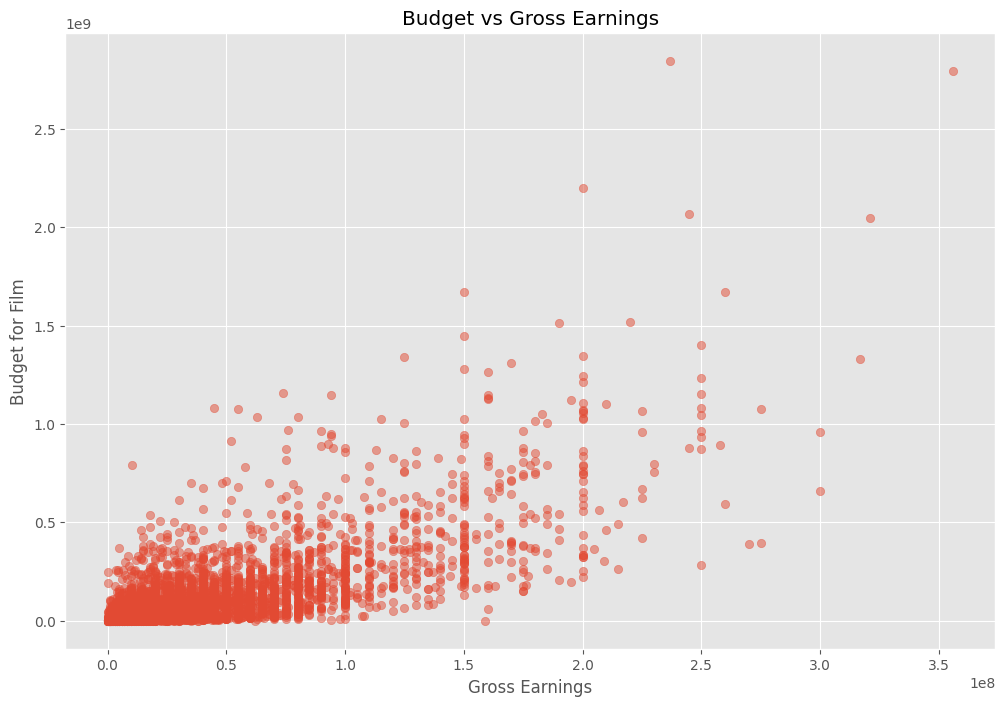

In [22]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [23]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,14,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,13,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,14,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,13,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,13,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,18,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,11,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,8,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,18,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


In [ ]:
df_numerized.corr(method='pearson')

In [ ]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [ ]:
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df

In [25]:
sns.swarmplot(x="rating", y="gross", data=df)

c:\Users\Aditi Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Aditi Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Aditi Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Aditi Joshi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use strip

sns.stripplot(x="rating", y="gross", data=df)